In [1]:
import pandas, subprocess, os, math, random, sys
import numpy as np
sys.path.append(".")
import duti.duti as duti
import matplotlib.pyplot as plt

In [2]:
def init_data(n, ratio=0.05):
    step  = math.pi * 2 / n

    X = np.arange(0, math.pi * 2, step)
    Y = np.sin(X)
    X.shape = (X.shape[0], 1)
    Y.shape = (Y.shape[0], 1)

    XX = np.arange(0, math.pi * 2, step / ratio)
    YY = np.sin(XX)
    XX.shape = (XX.shape[0], 1)
    YY.shape = (YY.shape[0], 1)

    return X, Y, XX, YY

In [3]:
def uniform_noise(n, Y):
    noise = []
    for i in range(n):
        idx = random.randint(0, Y.shape[0] - 1)
        while idx in noise:
            idx = random.randint(0, Y.shape[0] - 1)
        Y[idx][0] += random.random()
        noise.append(idx)
    return noise

In [4]:
def range_noise(l, r, Y):
    Y[l:r] = -Y[l:r]
    return list(range(l, r))

In [5]:
def find_errs(delta, noise, thr=1e-5):
    total = correct = 0
    for i, j in enumerate(delta):
        if abs(j) > thr:
            total += 1
            correct += i in noise
    if total:
        print('Recall: %d / %d = %.2f' % (correct, len(noise), float(correct) / len(noise)))
        print('Precision: %d / %d = %.2f' % (correct, total, float(correct) / total))
    else:
        print('No error found!')

In [6]:
X, Y, XX, YY = init_data(500, ratio=0.1)
noise = uniform_noise(100, Y)
delta = duti.regression(X, Y, XX, YY, np.ones((XX.shape[0], )) * 300, 3.8e-6, 0.8)
find_errs(delta, noise, 1e-2)

Recall: 67 / 100 = 0.67
Precision: 67 / 67 = 1.00


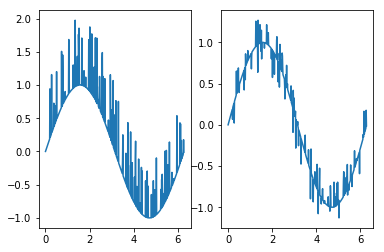

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(X, Y)
#ax[1].plot(X, Y+delta)
ax[1].plot(X, Y+delta*2)